<a href="https://colab.research.google.com/github/dinma-daniel/Abstarctive-text-summarizer/blob/main/Text_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytextrank
!pip install transformers
!pip install sentencepiece
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 21.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10

In [ ]:
import spacy 
import pytextrank

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('textrank')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv", error_bad_lines=False, engine = 'python')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,document,summary
0,jason blake of the islanders will miss the res...,blake missing rest of season
1,the u.s. military on wednesday captured a wife...,u.s. arrests wife and daughter of saddam deput...
2,craig bellamy 's future at west ham appeared i...,west ham drops bellamy amid transfer turmoil
3,cambridge - when barack obama sought advice be...,in search for expertise harvard looms large
4,"wall street held on to steep gains on monday ,...",wall street ends a three-day losing streak
...,...,...
19995,a rapidly growing world population and threat ...,u.n. food agency must help more people with le...
19996,ahead of nuclear talks between senior iranian ...,us urges iran to change course on its nuclear ...
19997,airbus ceo thomas enders dismissed a french in...,airbus ceo thomas enders calls eads insider tr...
19998,albania 's central bank said friday it has iss...,central bank licenses a local bank


In [ ]:
df1 = pd.read_csv("train1.csv", error_bad_lines=False, engine = 'python')
df1

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 12474: unexpected end of data


,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
12467,2354384a293ae4e895dcc4b4f4f4796c5f20ba7e,(CNN) -- Kei Nishikori made history as he beca...,Kei Nishikori makes tennis history at Japan Op...
12468,235472d6f54e0cedf8cbeb1027dea4971c57ccd2,Stoning remains the way Iranians -- overwhelmi...,A judicial panel has reinserted a stoning prov...
12469,23549ee28a738a5353290ded0b4272f2e36bc029,"By . Ashley Collman . PUBLISHED: . 10:48 EST, ...",34-year-old Robin Cyr's newborn daughter was p...
12470,23557ef12896a2409199577ea2831f675ee0fb36,(CNN) -- Army Sgt. Bowe Bergdahl's release fro...,Controversy roils over whether soldiers were k...


# **Abstarctive Text Summarizer Ver 1.0**

In [ ]:
example = df['document'][0]
example

'jason blake of the islanders will miss the rest of the season so he can be with his wife , who has thyroid cancer and is to give birth april # .'

In [ ]:
example1 = df1['article'][0]
example1

"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained 

In [ ]:
doc = nlp(example)
doc1 = nlp(example1)

In [ ]:
for sent in doc._.textrank.summary(limit_sentences=2):
  print(sent)


jason blake of the islanders will miss the rest of the season so he can be with his wife , who has thyroid cancer and is to give birth april # .


In [ ]:
for sent in doc1._.textrank.summary(limit_sentences=2):
  print(sent)

The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October.
Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A .


# **Text summarization with Pegasus model**

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [ ]:
# Load the pre-trained model and tokenizer
model_name = 'google/pegasus-xsum'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

In [ ]:
# Define a function that takes a long piece of text and summarizes it
def summarize_text(text):
    # Tokenize the input text and truncate it to fit the maximum sequence length
    input_ids = tokenizer.encode(text, max_length=1024, truncation=True, return_tensors='pt')
    
    # Generate the summary
    summary_ids = model.generate(input_ids, num_beams=4, max_length=100, early_stopping=True)
    
    # Decode the summary tokens back into text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    
    return summary



In [ ]:
text = df['document'][0]

summary = summarize_text(text)
print(summary)

The captain of Guernsey's rugby union team has been diagnosed with cancer.


In [ ]:
text = df1['article'][0]

summary = summarize_text(text)
print(summary)

Health officials in North Dakota are warning people who attended church services in Fargo, Grand and Jamestown to be aware of the symptoms of hepatitis A.


# **Text summarization with Hugging face Ver 1.5**

In [ ]:
test = df['document'][0]
test

'jason blake of the islanders will miss the rest of the season so he can be with his wife , who has thyroid cancer and is to give birth april # .'

In [ ]:
test1 = df1['article'][0]
test1

"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained 

In [ ]:
from transformers import pipeline

In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
summarizer(test, max_length=20, min_length=20, do_sample=False)

[{'summary_text': ' jason blake of the islanders will miss the rest of the season so he'}]

In [ ]:
summarizer(test1, max_length=20, min_length=20, do_sample=False)

[{'summary_text': ' Bishop John Folda of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds'}]

# **Text Summarizer using seq2seq Ver 2.0**

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 82.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import pandas as pd
from simpletransformers.seq2seq import Seq2SeqModel,Seq2SeqArgs

In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 10
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=False,
)
    

In [ ]:
df_train = pd.read_csv("train.csv", error_bad_lines=False, engine = 'python')
df_eval = pd.read_csv("val.csv", error_bad_lines=False, engine = 'python')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_train = df_train[['document', 'summary']]
df_eval = df_eval[['document', 'summary']]
df_train.rename(columns={'document': 'input_text', 'summary': 'target_text'}, inplace=True)
df_eval.rename(columns={'document': 'input_text', 'summary': 'target_text'}, inplace=True)

df_train = df_train.head(2)
df_eval = df_eval.head(2)


In [ ]:
df_train

,input_text,target_text
0,jason blake of the islanders will miss the res...,blake missing rest of season
1,the u.s. military on wednesday captured a wife...,u.s. arrests wife and daughter of saddam deput...


In [ ]:
df_eval

,input_text,target_text
0,mr. emmons also was part of the design team fo...,donn emmons architect of northern california l...
1,"the secret 's out : in `` in &amp; out , '' to...",in &amp; out brings gay sensibilities to mains...


In [ ]:
df_train['input_text']

0    jason blake of the islanders will miss the res...
1    the u.s. military on wednesday captured a wife...
Name: input_text, dtype: object

In [ ]:
df_train['target_text']

0                         blake missing rest of season
1    u.s. arrests wife and daughter of saddam deput...
Name: target_text, dtype: object

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
model.train_model(df_train, eval_data=df_eval)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

(10,
 {'global_step': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'eval_loss': [17.968332290649414,
   13.668017387390137,
   13.228614807128906,
   12.851284980773926,
   12.530264854431152,
   12.283251762390137,
   12.102070808410645,
   11.970074653625488,
   11.879666328430176,
   11.834329605102539],
  'train_loss': [16.1536865234375,
   15.62285327911377,
   13.932225227355957,
   12.789705276489258,
   12.503347396850586,
   12.116118431091309,
   11.89876937866211,
   11.762529373168945,
   11.60158634185791,
   11.487756729125977]})

In [ ]:
results = model.eval_model(df_eval)

AttributeError: ignored

In [ ]:
results

{'eval_loss': 12.217967987060547}

In [ ]:
print(model.predict(
        [
            "new zealand batting hero martin crowe hit england 's bowlers for six here on thursday , rattling up a magnificent ### not out on the first day of the second test at lord 's ."
        ]
    )
)
  

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

["new zealand batting hero martin crowe hit england's bowlers for"]


# **Abstarctive Text Summarizer using t5-large Ver 3.0**

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, T5Config
import torch

In [ ]:
#initialize the pre-trained model
modell = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
art = df['document'][0]
art

'jason blake of the islanders will miss the rest of the season so he can be with his wife , who has thyroid cancer and is to give birth april # .'

In [ ]:
art1 = df1['article'][0]
art1

"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained 

In [ ]:
preprocessed_text = art.strip().replace('\n','')
t5_input_text = 'summarize:' + preprocessed_text

In [ ]:
preprocessed_text1 = art1.strip().replace('\n','')
t5_input_text1 = 'summarize:' + preprocessed_text1

In [ ]:
t5_input_text

'summarize:jason blake of the islanders will miss the rest of the season so he can be with his wife , who has thyroid cancer and is to give birth april # .'

In [ ]:
t5_input_text1

"summarize:By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly

In [ ]:
len(t5_input_text.split())

32

In [ ]:
tokenized_text = tokenizer.encode(t5_input_text, truncation = True, return_tensors = 'pt', max_length=512).to(device)

In [ ]:
tokenized_text1 = tokenizer.encode(t5_input_text1, truncation = True, return_tensors = 'pt', max_length=512).to(device)

In [ ]:
summary_ids = modell.generate(tokenized_text, min_length=10, max_length=17)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
summary_ids1 = modell.generate(tokenized_text1, min_length=10, max_length=17)
summary1 = tokenizer.decode(summary_ids1[0], skip_special_tokens=True)

In [ ]:
summary_ids[0]

tensor([    0,  2662,   739,     3,   115, 16948,    13,     8,  3368,   277,
           56,  3041,     8,   880,    13,     8,   774])

In [ ]:
summary_ids1[0]

tensor([    0, 25214,    13,     8,   623,   839,  6502,   309, 25985,    16,
         3457, 16711,    65,  6666,  3986,    13,  2078])

In [ ]:
summary

'jason blake of the islanders will miss the rest of the season'

In [ ]:
df['summary'][0]

'blake missing rest of season'

In [ ]:
summary1

'bishop of the fargo Catholic Diocese in north Dakota has exposed hundreds of church'

# **Custom Abstarctive Text Summarizer Ver 5.0**

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import os
from nltk.corpus import stopwords
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Flatten,Dropout,BatchNormalization,Embedding,Input,TimeDistributed
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [ ]:
df_train = pd.read_csv("train.csv", error_bad_lines=False, engine = 'python')
df_eval = pd.read_csv("val.csv", error_bad_lines=False, engine = 'python')

In [ ]:
df_train1 = pd.read_csv("train1.csv", error_bad_lines=False, engine = 'python')
df_train1 = df_train1[['article', 'highlights']]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 17487: unexpected end of data


In [ ]:
df_train1

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...
8120,"(CNN Student News) -- September 10, 2013 . The...","This page includes the show Transcript, the Da..."
8121,While Surrey were being beaten by Durham in th...,Kevin Pietersen on holiday with wife Jessica T...
8122,"By . Anthony Bond . PUBLISHED: . 06:31 EST, 6 ...","Chloe Waddell, 16, had gone to a party after p..."
8123,"WASHINGTON (CNN) -- From land, water and air, ...",Officials say Obama's historic inauguration po...


In [ ]:
df_train1['article'][0]

"By . Associated Press . PUBLISHED: . 14:11 EST, 25 October 2013 . | . UPDATED: . 15:36 EST, 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda (pictured) of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo, Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low, but officials feel it's important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained 

In [ ]:
import re
from sklearn.model_selection import train_test_split

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
def clean_text(text):
    
    text=text.lower()
    text=' '.join([contraction_mapping[i] if i in contraction_mapping.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    
    return text

In [ ]:
df_train1['article']=df_train1['article'].apply(clean_text)
df_train1['highlights']=df_train1['highlights'].apply(clean_text)
df_train1['highlights']='<START> '+df_train1['highlights']+' <END>'

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(df_train1['article'],df_train1['highlights'],test_size=0.3,random_state=29)
print(len(X_train),len(Y_train))
print(len(X_val),len(Y_val))

12239 12239
5246 5246


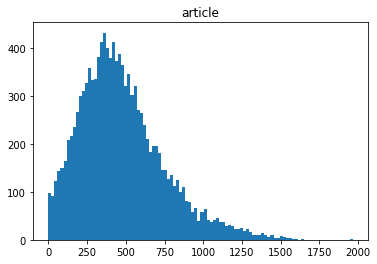

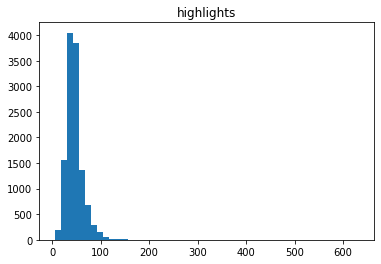

In [ ]:
art_len=[len(i.split()) for i in X_train]
sum_len=[len(i.split()) for i in Y_train]
plt.hist(art_len,bins=100)
plt.title('article')
plt.show()
plt.hist(sum_len,bins=50)
plt.title('highlights')
plt.show()

In [ ]:
max_art_len=500
max_sum_len=100

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
article_tokenizer=Tokenizer(oov_token='<UNK>')
article_tokenizer.fit_on_texts(X_train)
tokenized_X_train=article_tokenizer.texts_to_sequences(X_train)
tokenized_X_val=article_tokenizer.texts_to_sequences(X_val)

In [ ]:
art_vocab_size=len(article_tokenizer.word_index)+1

In [ ]:
padded_X_train=pad_sequences(tokenized_X_train,maxlen=max_art_len,padding='post',truncating='post')
padded_X_val=pad_sequences(tokenized_X_val,maxlen=max_art_len,padding='post',truncating='post')

In [ ]:
print(padded_X_train.shape,padded_X_val.shape)

(12239, 500) (5246, 500)


In [ ]:
summary_tokenizer=Tokenizer(oov_token='<UNK>')
summary_tokenizer.fit_on_texts(Y_train)
tokenized_Y_train=summary_tokenizer.texts_to_sequences(Y_train)
tokenized_Y_val=summary_tokenizer.texts_to_sequences(Y_val)

In [ ]:
sum_vocab_size=len(summary_tokenizer.word_index)+1

In [ ]:
padded_Y_train=pad_sequences(tokenized_Y_train,maxlen=max_sum_len,padding='post',truncating='post')
padded_Y_val=pad_sequences(tokenized_Y_val,maxlen=max_sum_len,padding='post',truncating='post')

In [ ]:
print(padded_Y_train.shape,padded_Y_val.shape)

(12239, 100) (5246, 100)


In [ ]:
reverse_art_index=article_tokenizer.index_word
reverse_sum_index=summary_tokenizer.index_word
sum_wordindex=summary_tokenizer.word_index

In [ ]:
encoder_inputs=Input(shape=(max_art_len,))
encoder_emb=Embedding(art_vocab_size,100,trainable=True,name='Encoder_Embedding_layer')(encoder_inputs)
encoder_lstm1=LSTM(300,return_sequences=True,return_state=True,name='Encoder_LSTM1')
enclstm1_outputs,enclstm1_h,enclstm1_c=encoder_lstm1(encoder_emb)


decoder_inputs=Input(shape=(None,))
decoder_em=Embedding(sum_vocab_size,100,trainable=True,name='Decoder_Embedding_layer')
decoder_emb=decoder_em(decoder_inputs)

decoder_lstm1=LSTM(300,return_sequences=True,return_state=True,name='Decoder_LSTM1')
declstm1_output,declstm1_h,declstm1_c=decoder_lstm1(decoder_emb,initial_state=[enclstm1_h,enclstm1_c])

output_layer=TimeDistributed(Dense(sum_vocab_size,activation='softmax',name='softmax'))
output=output_layer(declstm1_output)

model=Model([encoder_inputs,decoder_inputs],output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 Encoder_Embedding_layer (Embed  (None, 500, 100)    7623900     ['input_1[0][0]']                
 ding)                                                                                            
                                                                                                  
 Decoder_Embedding_layer (Embed  (None, None, 100)   3293200     ['input_2[0][0]']            

In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy')

In [ ]:
model.fit([padded_X_train,padded_Y_train[:,:-1]],padded_Y_train[:,1:],
          epochs=1,
          validation_data=([padded_X_val,padded_Y_val[:,:-1]],padded_Y_val[:,1:]),
          batch_size=64)

192/192 [==============================] - 4467s 23s/step - loss: 4.2272 - val_loss: 3.4586


In [ ]:
infencoder_model=Model(inputs=[encoder_inputs],outputs=[enclstm1_outputs,enclstm1_h,enclstm1_c])

infdecoder_model_state_input_h=Input(shape=(300,),name='infdec_I1')
infdecoder_model_state_input_c=Input(shape=(300,),name='infdec_I2')

infdeclstm1_output,infdec_h,infdec_c=decoder_lstm1(decoder_emb,initial_state=[infdecoder_model_state_input_h,
                                                                                                infdecoder_model_state_input_c
                                                                                               ])

infdec_output=output_layer(infdeclstm1_output)                         

infdecoder_model=Model(inputs=[decoder_inputs]+[infdecoder_model_state_input_h,infdecoder_model_state_input_c],
                       outputs=[infdec_output]+[infdec_h,infdec_c])

In [ ]:
infencoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 Encoder_Embedding_layer (Em  (None, 500, 100)         7623900   
 bedding)                                                        
                                                                 
 Encoder_LSTM1 (LSTM)        [(None, 500, 300),        481200    
                              (None, 300),                       
                              (None, 300)]                       
                                                                 
Total params: 8,105,100
Trainable params: 8,105,100
Non-trainable params: 0
_________________________________________________________________


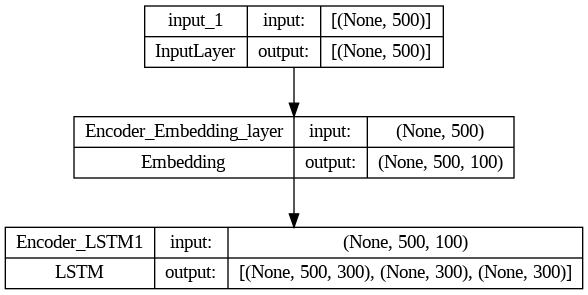

In [ ]:
plot_model(infencoder_model,show_shapes=True)

In [ ]:
infdecoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 Decoder_Embedding_layer (Embed  (None, None, 100)   3293200     ['input_2[0][0]']                
 ding)                                                                                            
                                                                                                  
 infdec_I1 (InputLayer)         [(None, 300)]        0           []                               
                                                                                                  
 infdec_I2 (InputLayer)         [(None, 300)]        0           []                         

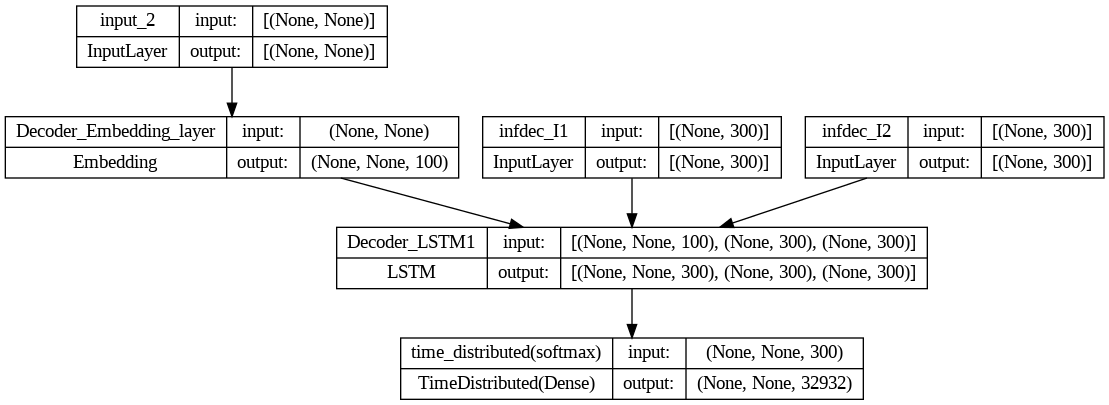

In [ ]:
plot_model(infdecoder_model,show_shapes=True)

In [ ]:
def decode_sequence(inp_seq):
    
    enc_out,enc_h,enc_c=infencoder_model.predict(inp_seq)
    
    tar_seq=np.zeros((1,1))
    tar_seq[0,0]=sum_wordindex['start']
    
    stop_loop=False
    decoded_string=''
    
    while not stop_loop:
       
        dec_out,dec_h,dec_c=infdecoder_model.predict([tar_seq]+[enc_h,enc_c])
        
        tar_token_index=np.argmax(dec_out[0,-1,:])
        tar_token_word=sum_wordindex[tar_token_index]
        
        if tar_token_word =='end' or len(decoded_string)>=max_art_len:
            
            stop_loop=True
        else:
            decoded_string+=tar_token_word
            
            tar_seq=np.zeros((1,1))
            tar_seq[0,0]=tar_token_index
            
            
            enc_h=dec_h
            enc_c=dec_c
            
    return decoded_string

In [ ]:
def seq2art(inp_seq):
    
    art=''
    
    for i in range(len(inp_seq)):
        
        if inp_seq[i]==0:
            break
        art+=reverse_art_index[inp_seq[i]]+' '
        
    return art


def seq2sum(inp_seq):
    
    summary=''
    
    for i in range(len(inp_seq)):
        
        if inp_seq[i]==0:
            break
        word=reverse_sum_index[inp_seq[i]]
        summary+=word+' '
            
    return summary
        

In [ ]:
print('Example Article : '+'\n',seq2art(padded_X_val[2]))
print('Example Highlights : '+'\n',seq2sum(padded_Y_val[2]))
print('Predicted Summary : '+'\n',decode_sequence(padded_X_val[2]))